In [1]:
x=1

In [2]:
import scanpy as sc
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
adata = sc.read('../../../pipeline/data/pp/totalvi_pbmc.h5ad')
adata

AnnData object with n_obs × n_vars = 647366 × 2000
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', '_scvi_labels', '_scvi_batch'
    var: 'feature_types', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'initial_clustering_colors', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_totalVI', 'X_umap', '_scvi_extra_categorical_covs', 'latent', 'protein_expression'
    l

In [4]:
adata.obs['Status_on_day_collection_summary'].cat.categories

Index(['Asymptomatic', 'Critical', 'Healthy', 'LPS_10hours', 'LPS_90mins',
       'Mild', 'Moderate', 'Non_covid', 'Severe'],
      dtype='object')

In [5]:
adata = adata[~adata.obs['Status_on_day_collection_summary'].isin(['Non_covid', 'LPS_10hours', 'LPS_90mins'])].copy()
adata

AnnData object with n_obs × n_vars = 624325 × 2000
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', '_scvi_labels', '_scvi_batch'
    var: 'feature_types', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'initial_clustering_colors', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_totalVI', 'X_umap', '_scvi_extra_categorical_covs', 'latent', 'protein_expression'
    l

In [7]:
adata.obs['Status'].value_counts()

Covid      527286
Healthy     97039
Name: Status, dtype: int64

In [8]:
adata.obs[['Status', 'patient_id']].drop_duplicates().groupby('Status').agg('count')

,patient_id
Status,
Covid,90
Healthy,23


In [9]:
n_samples = 23

In [12]:
healthy_samples = adata[adata.obs['Status'] == 'Healthy'].obs['patient_id'].drop_duplicates()
len(healthy_samples)

23

In [10]:
covid_samples = adata[adata.obs['Status'] == 'Covid'].obs['patient_id'].drop_duplicates()
len(covid_samples)

90

In [11]:
import random
random.seed(123)

In [14]:
covid_samples_keep = random.sample(list(covid_samples), n_samples)

In [15]:
samples_to_keep = list(healthy_samples) + covid_samples_keep
len(samples_to_keep)

46

In [16]:
adata_subset = adata[adata.obs['patient_id'].isin(samples_to_keep)]
adata_subset

View of AnnData object with n_obs × n_vars = 217635 × 2000
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', '_scvi_labels', '_scvi_batch'
    var: 'feature_types', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'initial_clustering_colors', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_totalVI', 'X_umap', '_scvi_extra_categorical_covs', 'latent', 'protein_expressio

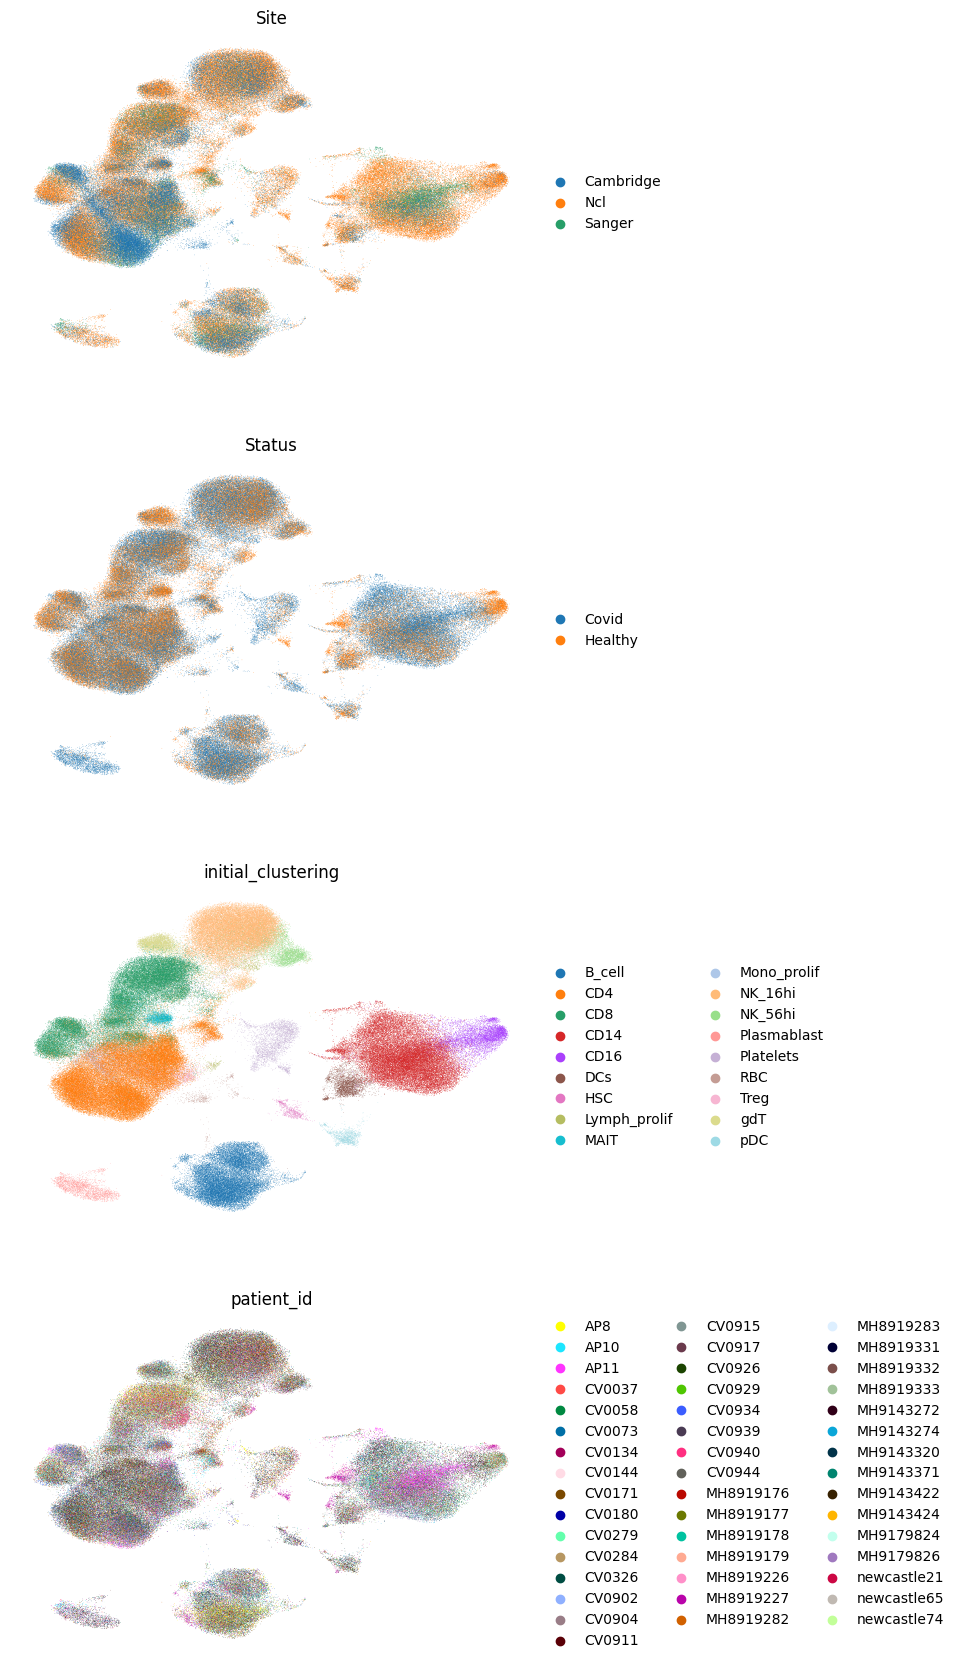

In [17]:
sc.pl.umap(adata_subset, color=['Site', 'Status', 'initial_clustering', 'patient_id'], ncols=1, frameon=False)

In [18]:
adata_subset.obs['Status'].value_counts()

Covid      120596
Healthy     97039
Name: Status, dtype: int64

In [19]:
adata_subset

AnnData object with n_obs × n_vars = 217635 × 2000
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', '_scvi_labels', '_scvi_batch'
    var: 'feature_types', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'initial_clustering_colors', 'leiden', 'neighbors', 'pca', 'umap', 'Status_colors', 'patient_id_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_totalVI', 'X_umap', '_scvi_extra_categorical_covs'

In [20]:
tmp = sc.AnnData(adata_subset.obsm['X_totalVI'])
tmp.obs = adata_subset.obs
tmp.obsm['X_umap'] = adata_subset.obsm['X_umap']
tmp

AnnData object with n_obs × n_vars = 217635 × 20
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', '_scvi_labels', '_scvi_batch'
    obsm: 'X_umap'

In [21]:
tmp.write('../../../pipeline/data/pp/totalvi_pbmc_embed_binary_balanced.h5ad')